In [2]:
#Reloads the modules to update any changes
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy.polynomial.polynomial as poly
import seaborn as sns
import matplotlib.colors as mcolors
from sympy import S, symbols
import regression_phi_nmono as regression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# note these files are not made available on git

In [3]:
f = open('../instance_files/instance_iceagg_flat_r10_compareDunnavan1', 'rb')
agg_as_flat, agg_bs_flat, agg_cs_flat, phi2Ds_flat, cplxs_flat, dds_flat = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_rand_r10_compareDunnavan', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2Ds_rand, cplxs_rand, dds_rand, major_ax_zs, depths = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_flat_phiextremes_n100_r10', 'rb')
agg_as_flatx, agg_bs_flatx, agg_cs_flatx, phi2Ds_flatx, cplxs_flatx, dds_flatx = pickle.load(f)

In [4]:
f = open('../instance_files/instance_iceagg_flat_allphi_n150_r10_plates', 'rb')
array_plates = pickle.load(f)
agg_as_plates_flat = array_plates['agg_as']
agg_bs_plates_flat = array_plates['agg_bs']
agg_cs_plates_flat = array_plates['agg_cs']
phi2Ds_plates_flat = array_plates['phi2Ds']
cplxs_plates_flat = array_plates['cplxs']
dds_plates_flat = array_plates['dds']

f = open('../instance_files/instance_iceagg_flat_allphi_n150_r10_columns', 'rb')
array_columns = pickle.load(f)
agg_as_columns_flat = array_columns['agg_as']
agg_bs_columns_flat = array_columns['agg_bs']
agg_cs_columns_flat = array_columns['agg_cs']
phi2Ds_columns_flat = array_columns['phi2Ds']
cplxs_columns_flat = array_columns['cplxs']
dds_columns_flat = array_columns['dds']

f = open('../instance_files/instance_iceagg_rand_n150_r10_plates_reproduce', 'rb')
array_plates = pickle.load(f)
agg_as_plates_rand = array_plates['agg_as']
agg_bs_plates_rand = array_plates['agg_bs']
agg_cs_plates_rand = array_plates['agg_cs']
phi2Ds_plates_rand = array_plates['phi2Ds']
cplxs_plates_rand = array_plates['cplxs']
dds_plates_rand = array_plates['dds']

f = open('../instance_files/instance_iceagg_rand_n150_r10_columns_reproduce', 'rb')
array_columns = pickle.load(f)
agg_as_columns_rand = array_columns['agg_as']
agg_bs_columns_rand = array_columns['agg_bs']
agg_cs_columns_rand = array_columns['agg_cs']
phi2Ds_columns_rand = array_columns['phi2Ds']
cplxs_columns_rand = array_columns['cplxs']
dds_columns_rand = array_columns['dds']

In [4]:
f = open('../instance_files/instance_iceagg_rand_n150_a10_phi5_eqmajorax', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2D_rand, dds_rand = pickle.load(f)


f = open('../instance_files/instance_iceagg_flat_n100_a1000_allphi_eqmajorax', 'rb')
array = pickle.load(f)
agg_as_flat = array['agg_as']
agg_bs_flat = array['agg_bs']
agg_cs_flat = array['agg_cs']
phi2Ds_flat = array['phi2Ds']
cplxs_flat = array['cplxs']
dds_flat = array['dds']

In [5]:
agg_as_rand = np.concatenate((agg_as_plates_rand, agg_as_columns_rand))
agg_bs_rand = np.concatenate((agg_bs_plates_rand, agg_bs_columns_rand))
agg_cs_rand = np.concatenate((agg_cs_plates_rand, agg_cs_columns_rand))
phi2Ds_rand = np.concatenate((phi2Ds_plates_rand, phi2Ds_columns_rand))
cplxs_rand = np.concatenate((cplxs_plates_rand, cplxs_columns_rand))
dds_rand = np.concatenate((dds_plates_rand, dds_columns_rand))

agg_as_flat = np.concatenate((agg_as_plates_flat, agg_as_columns_flat))
agg_bs_flat = np.concatenate((agg_bs_plates_flat, agg_bs_columns_flat))
agg_cs_flat = np.concatenate((agg_cs_plates_flat, agg_cs_columns_flat))
phi2Ds_flat = np.concatenate((phi2Ds_plates_flat, phi2Ds_columns_flat))
cplxs_flat = np.concatenate((cplxs_plates_flat, cplxs_columns_flat))
dds_flat = np.concatenate((dds_plates_flat, dds_columns_flat))

In [6]:
phica_rand = agg_cs_rand/agg_as_rand
phica_flat = agg_cs_flat/agg_as_flat
phiba_rand = agg_bs_rand/agg_as_rand
phiba_flat = agg_bs_flat/agg_as_flat

In [7]:
large = 20; med = 16; small = 14
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (7,7),
          'axes.labelsize': large,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          "font.family": "serif"}
plt.rcParams.update(params)

#### find mean $\phi_{ca}$ and $\phi_{ba}$ as a function of aspect ratio and orientation 

In [30]:
phios = [0.01, 0.10, 0.50, 1.0, 2.0, 10.0, 100.0]
N = 99  # take mean of 100th monomer
from IPython.display import Latex
orientations = ['rand', 'flat']
for orientation in orientations:
    phiba = phiba_rand if orientation == 'rand' else phiba_flat
    phica = phica_rand if orientation == 'rand' else phica_flat
    print(f'orientation: {orientation}')
    for p, phio in enumerate(phios):
        print('ba', phio, np.mean(phiba[p,0,:,N]))
        print('ca', phio, np.mean(phica[p,0,:,N]))

orientation: rand
ba 0.01 0.6733089789352252
ca 0.01 0.512885340445593
ba 0.1 0.6814457147185089
ca 0.1 0.5115162550324861
ba 0.5 0.6739546755816802
ca 0.5 0.5159942253373577
ba 1.0 0.6816796316351899
ca 1.0 0.5131510326713946
ba 2.0 0.6794320743358746
ca 2.0 0.5214966815940087
ba 10.0 0.6995524401419513
ca 10.0 0.5127317442645203
ba 100.0 0.6973675711039291
ca 100.0 0.5110804663322189
orientation: flat
ba 0.01 0.7866137603991281
ca 0.01 0.07947568811342705
ba 0.1 0.8538108125597422
ca 0.1 0.7189342146027341
ba 0.5 0.8521052104592667
ca 0.5 0.7277278512614521
ba 1.0 0.854290116370932
ca 1.0 0.7302982680059913
ba 2.0 0.8489543428867935
ca 2.0 0.7189456510036922
ba 10.0 0.797517501745227
ca 10.0 0.6135342832091248
ba 100.0 0.7721972743272663
ca 100.0 0.035991959289321966


In [34]:
Ns = np.arange(0,149,1)
phios = [0.01, 0.10, 0.50, 1.0, 2.0, 10.0, 100.0]

modes_rand_ba=[]
modes_rand_ca = []
modes_flat_ba=[]
modes_flat_ca=[]

orientations = ['rand', 'flat']
for orientation in orientations:
    phiba = phiba_rand if orientation == 'rand' else phiba_flat
    phica = phica_rand if orientation == 'rand' else phica_flat
    for p, phio  in enumerate(phios):    
        for N in Ns:

            data = np.vstack([phiba[p,0,:,N], phica[p,0,:,N]])
            kde = st.gaussian_kde(data)
            
            reg = regression.KDE(kde)
            mode_ba, mode_ca = reg.modes()
            if orientation == 'rand':
                modes_rand_ba.append(mode_ba)
                modes_rand_ca.append(mode_ca)
                if N == 98:
                    print(orientation, phio, mode_ba)
                    print(orientation, phio, mode_ca)
            else:
                modes_flat_ba.append(mode_ba)
                modes_flat_ca.append(mode_ca)
                if N == 98:
                    print(orientation, phio, mode_ba)
                    print(orientation, phio, mode_ca)

rand 0.01 0.47
rand 0.01 0.6
rand 0.1 0.52
rand 0.1 0.66
rand 0.5 0.55
rand 0.5 0.68
rand 1.0 0.53
rand 1.0 0.67
rand 2.0 0.49
rand 2.0 0.62
rand 10.0 0.47
rand 10.0 0.64
rand 100.0 0.49
rand 100.0 0.65
flat 0.01 0.08
flat 0.01 0.83
flat 0.1 0.75
flat 0.1 0.87
flat 0.5 0.72
flat 0.5 0.85
flat 1.0 0.73
flat 1.0 0.85
flat 2.0 0.72
flat 2.0 0.85
flat 10.0 0.7
flat 10.0 0.82
flat 100.0 0.03
flat 100.0 0.78


Aggregate aspect ratio evolution as a function of the number of monomers that comprise the aggregate (x-axis) for φca (top) and φba (bottom). Best fit lines from the modes of each kernel density estimate (e.g.,dots in Figure 6) are plotted for the random orientation (dashed lines) and the quasi-horizontal orientation (solid lines). 

rand
$\phi_{ba}$(0.01)=+1.371E-09$n_m^4$-2.524E-07$n_m^3$+9.745E-06$n_m^2$+1.573E-04$n_m^1$+6.283E-01$n_m^0$
$\phi_{ba}$(0.1)=-4.281E-09$n_m^4$+1.347E-06$n_m^3$-1.415E-04$n_m^2$+5.364E-03$n_m^1$+6.035E-01$n_m^0$
$\phi_{ba}$(0.5)=-3.569E-09$n_m^4$+1.117E-06$n_m^3$-1.116E-04$n_m^2$+4.168E-03$n_m^1$+5.996E-01$n_m^0$
$\phi_{ba}$(1.0)=-2.340E-09$n_m^4$+7.690E-07$n_m^3$-8.298E-05$n_m^2$+3.242E-03$n_m^1$+6.226E-01$n_m^0$
$\phi_{ba}$(2.0)=-1.261E-09$n_m^4$+4.826E-07$n_m^3$-6.511E-05$n_m^2$+3.509E-03$n_m^1$+5.733E-01$n_m^0$
$\phi_{ba}$(10.0)=-4.274E-09$n_m^4$+1.672E-06$n_m^3$-2.342E-04$n_m^2$+1.349E-02$n_m^1$+4.065E-01$n_m^0$
$\phi_{ba}$(100.0)=-5.216E-09$n_m^4$+1.846E-06$n_m^3$-2.242E-04$n_m^2$+1.070E-02$n_m^1$+4.916E-01$n_m^0$
flat
$\phi_{ba}$(0.01)=+2.351E-09$n_m^4$-7.016E-07$n_m^3$+6.660E-05$n_m^2$-1.938E-03$n_m^1$+7.875E-01$n_m^0$
$\phi_{ba}$(0.1)=+3.600E-09$n_m^4$-1.239E-06$n_m^3$+1.295E-04$n_m^2$-3.412E-03$n_m^1$+7.841E-01$n_m^0$
$\phi_{ba}$(0.5)=-4.732E-09$n_m^4$+1.609E-06$n_m^3$-1.895E

/network/rit/lab/sulialab/share/bin/miniconda3/envs/IPAS_v1.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox" which is no longer supported as of 3.3 and will become an error two minor releases later


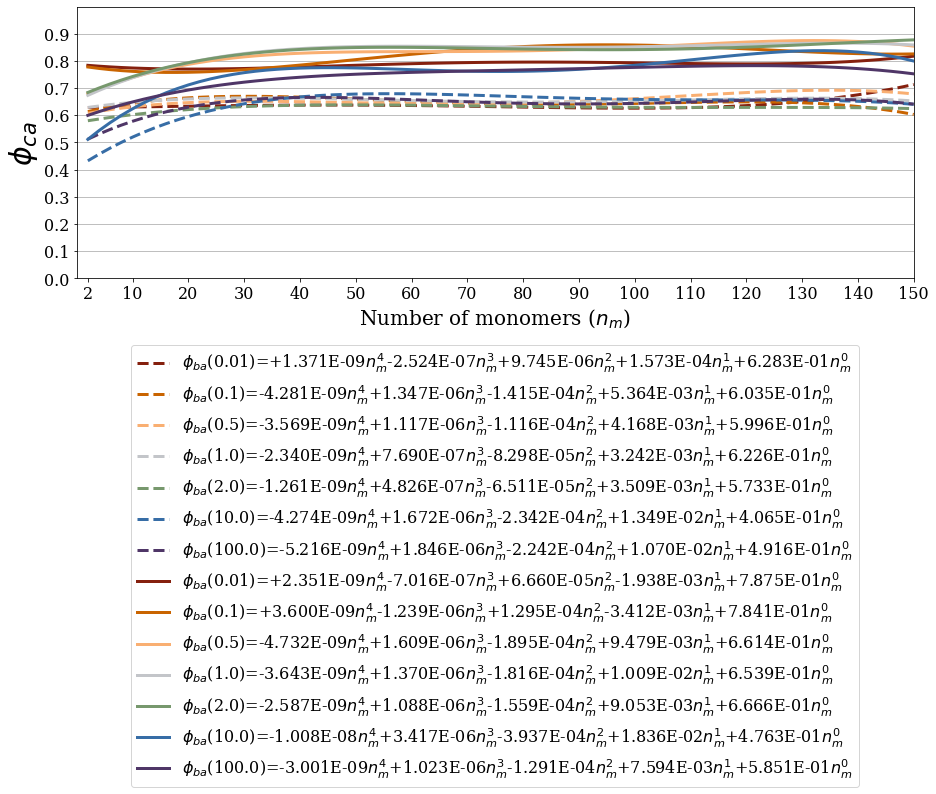

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

fig, ax = plt.subplots(1,1, figsize=(15,5), sharex=True);
fig.subplots_adjust(hspace=1.3)

#axs = axes.ravel()

modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))
modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))

orientations = ['rand', 'flat']
for orientation in orientations:
    print(orientation)
    for p, phio  in enumerate(phios):        
        if orientation == 'rand':
            linestyle = '--'
            modes = regression.Plot(ax, modes_rand_ba, modes_rand_ca, phios)
        else:
            linestyle = '-'
            modes = regression.Plot(ax, modes_flat_ba, modes_flat_ca, phios)
        modes.fit(p)
        modes.plot(p, linestyle)
            
plt.savefig('../plots/N_phi_polyfit.pdf', bbbox='tight')

In [138]:
# check a fit equation is correct when plugging in for nm
x=2
y = -2.50E-9*x**4+8.28E-7*x**3-1.14E-4*x**2+1.06E-2*x+1.44E-1
y

0.16475058399999998

Below: Evolution of φba(x-axis) and φca(y-axis) for different monomer aspect ratios (φm, top to bottom) andnumber of monomers (nm, left to right). Each aggregate is formed 300 times every time a new monomer is addedfor the random orientation (red) and quasi-horizontal orientation (blue) to create a multivariate kernel density estimate (contoured).

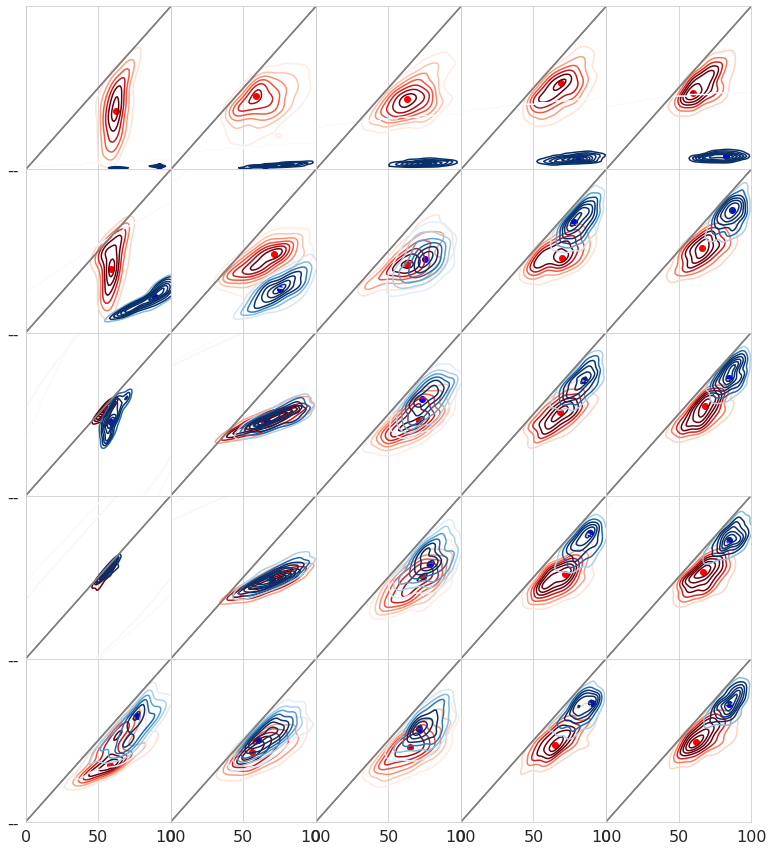

In [19]:
fig, axes = plt.subplots(5,5, figsize=(13,15), sharex=True, sharey=True)
axs = axes.ravel()
plt.subplots_adjust(wspace=0, hspace=0)

Ns = [0,1,8,48,98]
phios = [0,1,2,3,4]
sns.set_style('whitegrid')


orientations = ['rand', 'flat']
for orientation in orientations:
    phiba = phiba_rand if orientation == 'rand' else phiba_flat
    phica = phica_rand if orientation == 'rand' else phica_flat
    contour_color='Blues' if orientation == 'flat' else 'Reds'
    mode_color = 'r' if orientation == 'rand' else 'b'
    i=0
    for p, phio  in enumerate(phios):    
        for N in Ns:
            data = np.vstack([phiba[p,0,:,N], phica[p,0,:,N]])
            kde = st.gaussian_kde(data)
            
            reg = regression.KDE(kde)
            Z = reg.estimate_kde()
            mode_ba, mode_ca = reg.modes()
            
            img = axs[i].contour(Z, cmap=contour_color, vmin=1, vmax=10)
            axs[i].scatter(float(mode_ca*100), float(mode_ba*100), color = mode_color)
            # plot diagonal lines to prolate spheroid
            axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '--', zorder=2)
            i+=1

In [19]:
#prints the primary shape per phi_m-N pair as oblate or prolate
Ns = [0, 1, 8, 48, 98, 148]
phioarr=[0.01, 0.1, 0.5, 1.0, 2.0, 10., 100]
phios = [0,1,2,3,4,5,6] #0.1, 0.25, 0.5, 1.0, 2.0, 4.0, 10.
print('phi \t N \t oblates\t prolates \tprolates majority?')

for c, phio in enumerate(phios):    
    for n, N in enumerate(Ns):
        oblates = 0
        prolates = 0
        for l in range(300):
            if agg_bs_flat[phio,0,l,N] - agg_cs_flat[phio,0,l,N] <= agg_as_flat[phio,0,l,N] - agg_bs_flat[phio,0,l,N]:
                prolates +=1
            else:
                oblates+=1
        if prolates>oblates:
            bigger = 'True'
        else:
            bigger = ' '
            
            
        print('%3.2f, %5d, %10.2f, %15.2f, %15s' %(phioarr[phio], Ns[n]+2, (oblates/300)*100, (prolates/300)*100, bigger))
            


phi 	 N 	 oblates	 prolates 	prolates majority?
0.01,     2,     100.00,            0.00,                
0.01,     3,      98.00,            2.00,                
0.01,    10,      98.00,            2.00,                
0.01,    50,      99.00,            1.00,                
0.01,   100,     100.00,            0.00,                
0.01,   150,      99.33,            0.67,                
0.10,     2,     100.00,            0.00,                
0.10,     3,      86.00,           14.00,                
0.10,    10,      57.00,           43.00,                
0.10,    50,      35.67,           64.33,            True
0.10,   100,      47.67,           52.33,            True
0.10,   150,      38.67,           61.33,            True
0.50,     2,       0.00,          100.00,            True
0.50,     3,      46.33,           53.67,            True
0.50,    10,      36.33,           63.67,            True
0.50,    50,      37.67,           62.33,            True
0.50,   100,      39.33,